### **Road To ML: Course 4 - Machine Learning with Tree-Based Models in Python**

#### **Chap 1: Classification and Regression Trees (CART)**

##### **CART**
**Advantages**
- Learn sequence of if-else quesitions about individual features to infer labels
- Easy to understand, use and interpret
- Flexibility: Can capture non-linear relationships between features and labels
- Don't require scaling i.e. Standardization and Normalization

**Limitations**
- Classification: Can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set

Example:\
![title](https://i.ibb.co/WkSB752/tree.png)

##### **Decision Boundary/Regions: Linear Model vs CART**
Notice: Decision tree divide features space into rectangular regions\
![title](https://i.ibb.co/jD2pXwd/cartt.png)

In [5]:
# Import necessary module
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [2]:
# exercise

In [3]:
df = pd.read_csv("datasets/breast_cancer.csv",header=0)
df['diagnosis'] = df['diagnosis'].replace(['B','M'],[0,1])
X = df[['radius_mean','concave points_mean']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print('Score:',accuracy_score(y_test, y_pred))
print(y_pred[0:5])

Score: 0.8859649122807017
[1 0 0 1 0]


###### Helper funciton for next exercise

In [4]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.ylim((0, 0.2))

C:\Users\JIBJIB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\JIBJIB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


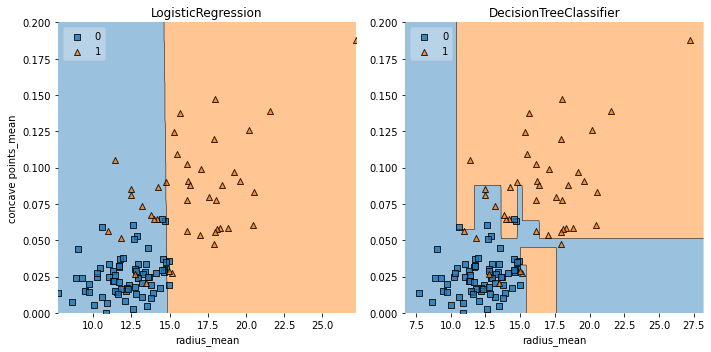

In [5]:
# Plotting Logistic Regression vs Decision tree

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

##### **How classification tree works**

**Vocabs**
- **Decision Tree**: data structure consisting of a hierachy of nodes.
- **Node**: question or prediction.
- **Root**: beginning node. no parents, only children nodes.
- **Internal node**: node that has a parent, rising 2 children nodes.
- **Leaf**: one parent node, no children nodes -> prediction

*Tree learn to produce purest leafs*\
![title](https://i.ibb.co/SBpTd55/dictt.png)

**Information Gain (IG)**\
![title](https://i.ibb.co/4W265yS/IG.png)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$

Some criterion used to measure the node's impurity:
- gini-index
- entropy

Classification-tree learning (unconstrained trees):
- Nodes are grown recursively (based on the state of its predecessors)
- At each node, split the data based on:
    -   feature $(f)$ and split-point $(sp)$ to maximize $IG(node)$
- If $IG(node) = 0(null)$, the node is declared as a leaf

*p.s. for the constrained tree, if the maximum depth is given, all the nodes having a depth of that will be declared as a leaf even if it's not null*

In [6]:
# exercise

Which of the following does not follow the rules of unconstrained classification tree?\
A) The existence of a node depends on the state of its predecessors.\
B) The impurity of a node can be determined using different criteria such as entropy and the gini-index.\
C) When the information gain resulting from splitting a node is null, the node is declared as a leaf.\
D) When an internal node is split, the split is performed in such a way so that information gain is minimized.

<b>*Answer: D*</b> (splitting an internal node always involves maximizing information gain)

In [7]:
# Comparing between the criterion (Gini vs Entropy)
df = pd.read_csv("datasets/breast_cancer.csv",header=0)
df['diagnosis'] = df['diagnosis'].replace(['B','M'],[0,1])
y = df['diagnosis'].values
X = df.drop(['diagnosis','id','Unnamed: 32'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using the gini index: ', accuracy_gini)

# Most of the time, the gini index and entropy lead to the same results.
# The gini index is slightly faster to compute and is the default criterion -
# used in the DecisionTreeClassifier model of scikit-learn.

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


##### **Decision-tree for regression**

- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

##### Linear Regression vs Decision Tree
![title](https://i.ibb.co/Fn3LGbB/versus.png)

In [8]:
# exercise

In [9]:
# Training regression tree
df = pd.read_csv("datasets/auto-mpg.csv",header=0)
col_names = {1 : 'USA', 2:'Europe', 3: 'Asia'}
df['origin'] = df['origin'].replace(col_names)
df = pd.get_dummies(df, columns =['origin'])

df.replace('?', np.nan, inplace=True)
df.drop(['car name',"cylinders"],axis=1,inplace=True)
df.dropna(inplace=True)
df['horsepower']= df['horsepower'].astype('float64')

y = df['mpg']
X = df.drop('mpg',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)
X_train
dt.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [10]:
# Evaluate the regression tree
'''The RMSE of a model measures, on average, how much the model's predictions
differ from the actual labels. The RMSE of a model can be obtained by computing
the square root of the model's Mean Squared Error (MSE).'''

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred_dt = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred_dt)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.28


In [11]:
# Linear regression vs regression tree
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

# Compute y_pred
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.58
Regression Tree test set RMSE: 3.28


#### **Chap 2: The Bias-Variance Tradeoff**

##### **Generalization Error**

- Supervised learning: $y = f(x)$, $f$ is unknown\
![title](https://i.ibb.co/znDP0NT/graph-f.png)

**Goals:**
- To find $\hat{f}$ (model) that best approximates $f$ ($\hat{f} \approx f$)
    - where $\hat{f}$ is Logistic Regression, Decision Tree, Neural Network, etc..
- Discard noise as much as possible
- **End Goals:** $\hat{f}$ achieve low predictive error (high accuracy) on unseen datasets

**Difficulties when approximating $f$:**
- Overfitting: where the model fits the training set noise\
![title](https://i.ibb.co/ry02sc2/overrr.png)

- Underfitting: where the model is not flexible enough to approximate $f$\
![title](https://i.ibb.co/myDCsBr/underr.png)\
*Training set error $\approx$ testing set error, but the errors are still high*

**Generalization error of $\hat{f}$:**
- Does $\hat{f}$ perform well on unseen data?
- $\hat{f} = bias^2 + variance + irreducible\ error$

**Bias:**
- error term that tells you how much $\hat{f}$ and $f$ are different ($\hat{f}\neq f$)
- High bias model -> underfitting\
![title](https://i.ibb.co/WpDWPpk/biasd.png)\
*bias model (black line)*

**Variance:**
- how much $\hat{f}$ is inconsistent over diffrent training data sets
- High variance model -> overfitting\
![title](https://i.ibb.co/L6hyx7P/varrr.png)\
*variance model (black line)*

**Model complexity**
- sets the flexibility of $\hat{f}$
- i.e. increase max tree depth, minimum samples per leaf

**Bias-variance tradeoff:**
- we need to find the model complexity that achieves the lowest generalization error
![title](https://i.ibb.co/NZVWvy0/eoiccc.png)

![title](https://i.ibb.co/WcCwydb/yes.png)\
*center = true function $f$*

In [12]:
# exercise 1

Which of the following correctly describes the relationship between $\hat{f}$'s complexity and $\hat{f}$'s bias and variance terms?\
A) As the complexity of $\hat{f}$ decreases, the bias term decreases while the variance term increases.\
B) As the complexity of $\hat{f}$ decreases, both the bias and the variance terms increase.\
C) As the complexity of $\hat{f}$ increases, the bias term increases while the variance term decreases.\
D) As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increases.

<b>*Answer: D*</b>

In [13]:
# exercise 2

Which of the following statements is true?\
![title](https://assets.datacamp.com/production/repositories/1796/datasets/f905399bc06da86c2a3af27b20717de5a777e6e1/diagnose-problems.jpg)

A) $A$ suffers from high bias and overfits the training set.\
B) $A$ suffers from high variance and underfits the training set.\
C) $B$ suffers from high bias and underfits the training set.\
D) $B$ suffers from high variance and underfits the training set.

<b>*Answer: C*</b>

##### **Diagnose bias and variance problems**

**Estimating Generalization Error**
- cannot be done directly since:
    - $f$ is unknown
    - we usually have 1 dataset
    - noise is unpredictable

Solution: Split data into training set and test set

**Better model evaluation with Cross-Validation**:
- test set should not be touched until we are confident with the $\hat{f}$'s performance
- evaluating $\hat{f}$ on training set gives biased estimate

Solution: Cross-validation (K-Fold CV, Hold-Out CV)

**K-Fold CV**:
- the training set is split randomly (*k*) partitions/folds
- each time, one fold is picked for evaluation after training $\hat{f}$ on the other 9 folds
- at the end, we will obtain a list of *k* errors
    - CV error is computed as the mean of that list

**Diagnose Variance Problems**:
- $\hat{f}$ suffer from **high variance** when: CV error > training set error
- it **overfit** the training set
    - solution: decrease model complecity
        - i.e. decrease max depth, increase min samples per leaf, gather more data

**Diagnose Bias Problems**:
- $\hat{f}$ suffer from **high bias** when: CV error $\approx$ training set error $>>$ desired error
- it **underfit** the training set
    - solution: increase model complecity
        - i.e. increase max depth, decrease min samples per leaf, gather more relavent features

In [14]:
# exercise 1: Instantiate the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

In [16]:
# exercise 2: Evaluate the 10-fold CV error

In [17]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.26


In [18]:
# exercise 3: Evaluate the training error

In [19]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 4.09


In [20]:
# exercise 4: High bias or high variance?

From Chapter 1 Lesson 3 (Evaluate the regression tree), we got a $baseline RMSE$ of 3.28 which is considered to be 'good enough'.
In the earlier exercise we test it again using $CV$ and $RMSE$ and got a result of 4.26 and 4.09 respectively.

it is $CV\approx RMSE >> baseline RMSE$\
Therefore, our **dt** suffers from high bias and is underfitting the training set

##### **Ensemble Learning**

Recall the limitations of CARTs:
- Classification: Can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set

Ensemble Learning takes the advantage of the flexibility CARTs while reducing their tendency to memorize noise
![title](https://i.ibb.co/sj9MT9m/ensemm.png)

**Voting Classifier**
- binary classification task
- $N$ classifier making prediction: $P_1, P_2, P_N$ with the output of either 0 or 1
- meta model output the final prediction by hard voting. which number has the most amount of vote win!
![title](https://i.ibb.co/hBBysJ4/voteme.png)

In [21]:
# exercise 1: Define the ensemble

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

# Instantiate lr
lr = LogisticRegression(random_state=1, max_iter=100, n_jobs=1)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [23]:
# exercise 2: Evaluate individual classifiers

In [24]:
df = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv', header=0)
y = df['Liver_disease']
X = df.drop('Liver_disease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.724
Classification Tree : 0.730


C:\Users\JIBJIB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# exercise 3: Better performance with a Voting Classifier

In [26]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.764


C:\Users\JIBJIB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Chap 3: Bagging and Random Forests**

##### **Boostrap aggregation (Bagging)**

- In bagging, the ensemble is formed by models that use the same training algorithm.
    - Theses models are not trained on the entire training set. It is trained on a different subset of the data.
- can reduce the variance of individual models in the ensemble.
- improve the stability and accuracy of machine learning algorithms
- helps to avoid overfitting

**Boostrapping**
- will drawn samples with replacement (any samples can be drawn many times)

**Aggregating**
- consists of drawing N different boostrap samples from training set
- each of the boostrap samples are used to train N models that use the same algorithm
![title](https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png)

**Bagging**\
Classification:
- aggregates predictions by majority voting
- Classifier: BaggingClassifier

Regression:
- aggregates predictions by averaging
-  Regressor: BaggingRegressor


In [27]:
# exercise 1: Define the bagging classifier

In [28]:
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [29]:
# exercise 2: Evaluate Bagging performance

In [30]:
df = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv', header=0, index_col=0)
df.head()
y = df['Liver_disease']
X = df.drop('Liver_disease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

# Fit bc to the training set
bc.fit(X_train,y_train)
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test,y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of bc: 0.66
Test set accuracy of dt: 0.63


##### **Out of Bag Evaluation**

In bagging:
- some instances may be sampled several times for one model
- other instances may not be sampled at all


OOB is use to measure the accuracy of classifiers.
- For each model, 63% of the training instances are sampled
- The remaining 37% constitute OOB instances.\
![title](https://i.ibb.co/vzF8wp4/nuun.png)

In [31]:
# exercise 1: Prepare the ground (OOB)

In [32]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [33]:
# exercise 2: OOB Score vs Test Set Score

In [34]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


##### **Random Forests (RF)**

- Base estimator: Decision Tree
- Each estimator is trained on a di(erent bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- $d$ features are sampled at each node without replacement\
( $d$ < total number of features )\
![title](https://i.ibb.co/mJ1JR7c/traini.png)
![title](https://i.ibb.co/Xb1TSBV/predd.png)

**Random Forests: Classification & Regression**\
Classification:
- aggregates predictions by majority voting
- Classifier: RandomForestClassifier

Regression:
- aggregates predictions by averaging
-  Regressor: RandomForestRegressor

*in general, Random Forests achieves a lower variacne than individual trees*

**Feature Importance**
- Tree-based methods: enable measuring the importance of each feature in prediction
- how much the tree nodes use a particular feature (weighted average) to reduce impurity
- use: feature_importance_

In [35]:
# example 1: Train an RF regressor

In [36]:
from sklearn.ensemble import  RandomForestRegressor

df = pd.read_csv('datasets/bike_sharing_demand.csv', header=0)
y = df['cnt']
X = df.drop('cnt',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [37]:
# exercise 2: Evaluate the RF regressor

In [38]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


In [39]:
# exercise 3: Visualizing features importances

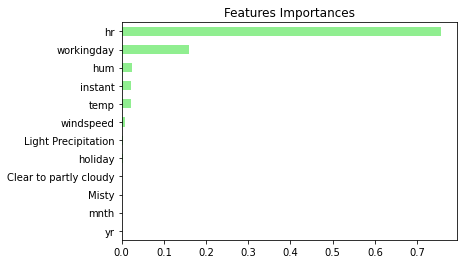

In [40]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

#### **Chap 4: Boosting**

**Backgroud:**
- Boosting: Ensemble method combining several weak learners to form a strong learner.
- Weak learner do slightly a better job in random guessing
    - i.e. Decision stump (CART with max depth of 1)
- Boosting train an ensemble of predictors sequentially
    - Each predictor tries to correct its predecessor.
- Boosting method:
    - AdaBoost (adaptive boosting)
    - Gradient Boosting

##### **AdaBoost**

**Adaboost (Adaptive Boosting)**
- Each predictor pays more attention to the instances that is wrongly predicted by its predecessor by constantly changing the weights of the training instances.
- Each predictor assign the coefficient $\alpha$ which depends on the predictor's training error.
![title](https://i.ibb.co/d6dQ3Mc/adada.jpg)

**Learning rate**
- $0<\eta<1$
- use to shrink the coefficient $\alpha$ of a trained predictor
- small $\eta$ should be compensate by a great number of estimators\
![title](https://i.ibb.co/zRK3jFG/leagnin.jpg)

**Prediction**
- Classification:
    - weighted majority voting
        - AdaBoostClassifier
- Regression:
    - weighted average
        - AdaBoostRegressor


In [1]:
# exercise 1: Define the AdaBoost classifier

In [6]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [7]:
# exercise 2: Train the AdaBoost classifier

In [19]:
df = pd.read_csv("datasets/indian_liver_patient_preprocessed.csv", header=0, index_col=0)
y = df['Liver_disease']
X = df.drop('Liver_disease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

print(y_pred_proba)

[0.48766009 0.55418951 0.51921243 0.43926891 0.47732092 0.52519308
 0.49235486 0.7124795  0.60950344 0.55051229 0.59791322 0.51055531
 0.49465367 0.56453191 0.48368686 0.5929771  0.57332579 0.49180299
 0.55586567 0.63671176 0.57658677 0.49592568 0.49968552 0.547432
 0.48563625 0.57387496 0.50023951 0.48951048 0.59908865 0.72024892
 0.49845777 0.5065494  0.49782885 0.50678095 0.5835487  0.66549909
 0.4123509  0.54528444 0.47896774 0.51748472 0.60759261 0.60738142
 0.54538028 0.53049161 0.6339782  0.57093478 0.49333084 0.53024335
 0.66275964 0.52892576 0.58952004 0.50082124 0.48838653 0.58741738
 0.59396335 0.50161923 0.46153584 0.67773    0.47881106 0.59482486
 0.5401021  0.47374417 0.50126468 0.69426843 0.50986729 0.57129408
 0.48797028 0.54049242 0.52353446 0.52530434 0.64408319 0.5767882
 0.49458549 0.48666719 0.45660689 0.56867447 0.49223892 0.49288073
 0.48084783 0.48387698 0.5309601  0.50257202 0.50192914 0.50043501
 0.55464185 0.50219998 0.49451038 0.48742786 0.53966841 0.6317985

In [20]:
# exercise 3: Evaluate the AdaBoost classifier

In [21]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.63


##### **Gradient Boosting (GB)**

- each predictor in the ensemble corrects its predecessor's error
- does not tweak the weights of training instances (unlike AdaBoost)
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted Trees: used CART as a base learner
![title](https://i.ibb.co/przjM9r/gbtr.jpg)

**Shrinkage**
- similar to AdaBoost learning rate (eta)
- $0<\eta<1$
- use to shrink the prediction $r$
- small $\eta$ should be compensate by a great number of estimators

**Prediction**
- Regression:
    - $y_{pred} = y_1+\eta r_1+...+\eta r_N$
        - GradientBoostingRegressor
- Classification:
    - GradientBoostingClassifier

In [22]:
# exercise 1: Define the GB regressor

In [23]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [24]:
# exercise 2: Train the GB regressor

In [35]:
df = pd.read_csv("datasets/bike_sharing_demand.csv", header = 0)
y = df['cnt']
X = df.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [37]:
# exercise 3: Evaluate the GB regressor

In [39]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_pred, y_test)

# Compute RMSE
rmse_test = mse_test**0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


##### **Stochastic Gradient Boosting (SGB)**

**Background**
- Cons of Gradient Boosting
    - exhaustive search procedure
- each CART is trained to find the best split points and features
    - may lead to CARTs using the same split points and maybe the same features

solution: Stochastic Gradient Boosting

**SGB**
- each tree is trained on a random subset of rows of the training data
- the sampled instances (40%-80% of the training set) are sampled without replacement
- features are sampled without replacement when choosing split points
- Results: create diversity, add variances to the ensemble of trees

![title](https://i.ibb.co/b5cgX6q/sbggga.jpg)

In [40]:
# exercise 1: Regression with SGB

In [43]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9, # each tree samples 90% of data for training
            max_features=0.75, # each tree uses 75% of available features to perform best-split
            n_estimators=200,                                
            random_state=2)

In [41]:
# exercise 2: Train the SGB regressor

In [45]:
df = pd.read_csv("datasets/bike_sharing_demand.csv", header = 0)
y = df['cnt']
X = df.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [ ]:
# exercise 3: Evaluate the SGB regressor

In [46]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


#### **Chap 5: Model Tuning**

##### **Tuning a CART's Hyperparameters**

**Background**
- parameters: learned from data
    - CART example: split of a node, split-feature of a node
- hyperparameter: not learned from data, set prior to training
    - CART example: max_depth, min_samples_leaf, splitting criterion

**Hyperparameter tuning**
- **Problem:** search for a set of optimal hyperparameters for a learning algorithm.
- **Solution:** find a set of optimal hyperparameters that results in an optimal model.
- **Optimal model:** yields an optimal score
- **Score:** accuracy (classification) and $R^2$(regression)
- cross-validation(CV) is used to estimate the generalization performance.

**Why tune hyperparameter?**
- default hyperparameter are not optimal for all problems
- it should be tune for the best model performance

**Hyperparameter: the approach**
- Grid search
- Random search
- Bayesian Optimization
- Genetic Algorithms

##### **Grid search CV**
- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance
- Search *exhaustively* through the grid.
- For each set of hyperparameter, evaluate each model's CV score.
- The optimal hyperparameters are those of the model achieving the best CV score.
- The bigger the grid, the longer it takes to find the solution.

In [ ]:
# exercise 1: Tree hyperparameters

Which of the following is not a hyperparameter of dt (DecisionTreeClassifier)?\
A) min_impurity_decrease\
B) min_weight_fraction_leaf\
C) min_features\
D) splitter \
<b>*Answer: C*</b>

In [ ]:
# exercise 2: Set the tree's hyperparameter grid

In [1]:
# Define params_dt
params_dt = {
    'max_depth': [2,3,4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
}

In [2]:
# exercise 3: Search for the optimal tree

In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(criterion='gini',random_state=1,splitter='best')

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

In [ ]:
# exercise 4: Evaluate the optimal tree

In [14]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score

df = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv', header=0)
y = df['Liver_disease']
X = df.drop('Liver_disease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1)

grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.707


##### **Tuning a RF's Hyperparameters**

**Background:**
- Hyperparameter tuning is computational expensive
    - sometimes leads to a very slight improvement
Better to weight the impact of tuning on the whole project

**RF uses:**
- CART hyperparameters
- number of estimators
- boostrap


In [ ]:
# exercise 1: Random forests hyperparameters

Which of the following is not a hyperparameter of rf(RandomForestRegressor)?\
A) min_weight_fraction_leaf\
B) criterion\
C) learning_rate\
D) warm_start \
<b>*Answer: C*</b>

In [ ]:
# exercise 2: Set the hyperparameter grid of RF

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

In [21]:
# exercise 3: Search for the optimal forest

In [23]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [ ]:
# exercise 4: Evaluate the optimal forest

In [24]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import  mean_squared_error as MSE

df = pd.read_csv('datasets/bike_sharing_demand.csv', header=0)
y = df['cnt']
X = df.drop('cnt',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Test RMSE of best model: 51.116
